<a href="https://colab.research.google.com/github/raulFuzita/cct_ai/blob/2022_5_20/raul_fuzita_2018337_ML_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CCT College Dublin Continuous Assessment**

## **Assessment Information**

Programme Title:             BSc (Hons) in Computing and IT Y4

Cohort:                      Sept21

Module Title(s):             Machine Learning for AI

Assignment Type:             Individual

Assignment Title:            ML_CA2

Lecturer(s):                 David McQuaid

Issue Date:                  25/04/2022

Submission Deadline Date:    20/05/2022

## **Student Information**

Name:                        Raul Macedo Fuzita

ID:                          2018337

## Jupyter Notebook Information <font color='red'>(Important)</font>

This assignment was performed on Google Colab in Jupyter Notebook. This notebook contains advanced features such as HTML tags, Jupyter Notebook form components compatible with the version below (description) or above (newer version), and Widgets components.

  If you are running on your local machine, please check if your Jupyter Notebook has the same version or above. This notebook was not tested in an old version, so I cannot guarantee support for the legacy notebooks.

  If you are not sure what Jupyter Notebook version you have, you will find a command to check the version. You can access this material on my Github account, available at: https://github.com/raulFuzita/cct_ai/tree/2022_5_20

```
Selected Jupyter core packages...
IPython          : 7.29.0
ipykernel        : 6.4.1
ipywidgets       : 7.6.5
jupyter_client   : 6.1.12
jupyter_core     : 4.8.1
jupyter_server   : 1.4.1
jupyterlab       : 3.2.1
nbclient         : 0.5.3
nbconvert        : 6.1.0
nbformat         : 5.1.3
notebook         : 6.4.5
qtconsole        : 5.1.1
traitlets        : 5.1.0
```

Make your own changes or have a copy in you Google Drive. Go to `File > Save a copy in Drive`

It is highly recommended to run the cell below. You might not have these packages installed on your machine. Any missing package will result in crashes.

In [ ]:
#@markdown 👈 &nbsp; **Please, run this code cell to install the packages below.** <font color="lightgreen">(Recommended)</font>

%pip install ipywidgets
%pip install gdown

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Please run this cell below to check the package version.

In [ ]:
#@markdown 👈 &nbsp; **Please, run this code cell to check your Jupyter Notebook version.** <font color="lightgreen">(Recommended)</font>

!jupyter --version

Selected Jupyter core packages...
IPython          : 7.29.0
ipykernel        : 6.4.1
ipywidgets       : 7.6.5
jupyter_client   : 6.1.12
jupyter_core     : 4.8.1
jupyter_server   : 1.4.1
jupyterlab       : 3.2.1
nbclient         : 0.5.3
nbconvert        : 6.1.0
nbformat         : 5.1.3
notebook         : 6.4.5
qtconsole        : 5.1.1
traitlets        : 5.1.0


## Importing All the Necessary Packages for This project <font color="red">(Important)</font>

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to load all the necessary packages. You must run this cell otherwise the rest of the code will not work.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import shutil

import tensorflow as tf
from tensorflow import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.vgg16 import VGG16

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import ipywidgets as widgets
from IPython.display import display, HTML


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TensorFlow version:
```
2.8.0
```

Make sure you are running TensorFlow with the same version or above.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to check your TensforFlow version.

print(tf.__version__)

2.8.0


Let's check if your PhysicalDevice can enable memory growth. Later on, you will have to run ```model.fit()``` function. If there is not enough memory when you run that function, you will get an error. Try to run the function again or reopen your Jupyter Notebook if that happens.

For further information visit this page <a href="https://stackoverflow.com/questions/71395098/invalidargumenterror-graph-execution-error-in-b3">InvalidArgumentError: Graph execution error</a>

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to check whether you can change the GPU memory allocation. If you can't, don't worry, you can still run the rest of the code.

physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  print("Invalid device or cannot modify virtual devices once initialized. ❌")

Invalid device or cannot modify virtual devices once initialized. ❌


# Computer Vision

## Instantiating Variables

Please, it is highly recommended you do not try for yourself to import the image dataset unless you understand how TensorFlow with Keras works. I designed this project to meet the assignment requirements.

If you run each code cell, Jupyter Notebook will download the dataset from Raul's Google Drive and set up the whole environment so the model will work.

The code cell below will create the necessary directories for the dataset and initialise other variables.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to create the directories.

# https://drive.google.com/file/d/1wIwWXQZPnPaJNSzbMcJcc6Qhyu2xjoKO/view?usp=sharing # smaller dataset for test
# https://drive.google.com/file/d/10DROU0HfbW4lNY743fOQO1-RcK3PVhMH/view?usp=sharing # full dataset
# url = "https://drive.google.com/uc?id=1wIwWXQZPnPaJNSzbMcJcc6Qhyu2xjoKO" # smaller dataset for test
url = "https://drive.google.com/uc?id=10DROU0HfbW4lNY743fOQO1-RcK3PVhMH" # full dataset

zip_file_name = "animal_faces.zip"

animal_dataset = "animal_faces/"
animal_data = "animal_data/"
animal_data_subdiect = {
    "train": animal_data + "train", 
    "test": animal_data + "test", 
    "validation": animal_data + "validation"}

output = animal_dataset + zip_file_name

if not os.path.exists(animal_dataset):
    os.makedirs(animal_dataset)

TRAINING_DIR = animal_data_subdiect['train']
VALIDATION_DIR = animal_data_subdiect['validation']
TESTING_DIR = animal_data_subdiect['test']


You can select which environment you are in, whether Google Colab Jupyter Notebook or a local machine. Even running this code cell in a local machine, you should be good with the default setting (Google Colab). Unless you face any issue with the next cell, you should select a different option and rerun the next code cell again.

Explanation for nerds (if you're not one, you can skip it):

The package gdown has a function called ```download``` to download the dataset from Google Drive. In some local machines, it might not work, if you select the option Local Jupyter Notebook it will download the image dataset calling ```!gdown --id <id> -O <destination>```

## Downloading Dataset

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell and then you can select another option or keep the default.

environment = 'Google Colab'

env_dropdown = widgets.Dropdown(
    options=['Google Colab', 'Local Jupyter Notebook'],
    value='Google Colab',
    description='Environment:',
)

@widgets.interact(input=env_dropdown)
def render(input):
  global environment
  environment = input


interactive(children=(Dropdown(description='Environment:', options=('Google Colab', 'Local Jupyter Notebook'),…

This next step is very important. It will download the dataset from Raul's Google Drive and save the zip file in the directory called ```animal_faces```. You do not have to do anything else but run the code cell below.

<font color="red">It might take a few minutes or very long. It depends on your internet connection and speed.</font>

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to download the dataset. When the download is complete, you will see a message in the console.

if environment == 'Local Jupyter Notebook':
    print(environment)
    !gdown --id 1wIwWXQZPnPaJNSzbMcJcc6Qhyu2xjoKO -O animal_faces/animal_faces.zip
elif environment == 'Google Colab':
    print(environment)
    import gdown
    gdown.download(url, output, quiet=False)
else: 
    print('Environment doesn\'t exist')

# check if the zip file is downloaded 
if os.path.exists(animal_dataset + zip_file_name):
    print('Zip file is downloaded ✔')
    local_zip = output
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    # zip_ref.printdir() # Use this to see what's in the zip file
    zip_ref.extractall()
    zip_ref.close()
    os.remove(animal_dataset + zip_file_name)

Google Colab


Downloading...
From: https://drive.google.com/uc?id=10DROU0HfbW4lNY743fOQO1-RcK3PVhMH
To: d:\Jupyter_notebook\notebooks\cct_classes\ML\may\animal_faces\animal_faces.zip
100%|██████████| 37.2M/37.2M [00:34<00:00, 1.08MB/s]


Zip file is downloaded ✔


## Preparing Dataset

The splitting data option will default set the training data to 75%, validation to 25%, and test to 5%.

The blue bar is the range for validation data. It is set by default for a range between 75 and 95. That means training data is 0 to 75, and test data is from 95 to 100.


In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to set the default values. Then, you can change the values if you want.

split_data = ()

split_data_slide = widgets.IntRangeSlider(
    value=[75, 95],
    min=0,
    max=100,
    step=5,
    description='Split data:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

@widgets.interact(input=split_data_slide)
def render(input):
  global split_data
  split_data = input

interactive(children=(IntRangeSlider(value=(75, 95), continuous_update=False, description='Split data:', step=…

The code cell below will split the dataset automatically according to Keras' requirements. Every time you change the splitting data option, run the cell below to update the directories and images.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to split the dataset. Now, seat back and relax 😄.

def getValPerc (data, perc):
    return int(len(data) * perc / 100)

if os.path.exists(animal_data):
    shutil.rmtree("animal_data")

if not os.path.exists(animal_data):
    os.makedirs(animal_data)

for subdirectory in animal_data_subdiect.values():
    if not os.path.exists(subdirectory):
        os.makedirs(subdirectory)

subdirectory_list = list()
for root, dirs, files in os.walk(animal_dataset, topdown=False):
    for name in dirs:
        subdirectory_list.append(name)

print(subdirectory_list)

for directory in subdirectory_list:
        files = os.listdir(animal_dataset + directory)
        
        train = getValPerc(files, split_data[0])
        validation = getValPerc(files, split_data[1]) - getValPerc(files, split_data[0]+1)
        test = len(files) - getValPerc(files, split_data[1]+1)

        print(train, validation, test)
        splited_data = {"train": train, "validation": validation, "test": test}
        
        for key, val in splited_data.items():

            # new part of code here 2022-05-19
            if key == "test":
                back_directory = ""
            else:
                back_directory = directory + "/"
                if not os.path.exists(animal_data + key + "/" + directory):
                    os.makedirs(animal_data + key + "/" + directory)

            chosen = np.random.choice(files, size=val, replace=False)
            for file in chosen:
                src = animal_dataset + directory + "/" + file
                dst = animal_data + key + "/" + back_directory + file
                shutil.copy(src, dst)
            files[:] = [j for i, j in enumerate(files) if i not in chosen]

print('Split data is done ✔')

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'PigHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']
75 19 5


C:\Users\raul\AppData\Local\Temp/ipykernel_4032/1925665351.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  files[:] = [j for i, j in enumerate(files) if i not in chosen]


120 31 7
75 19 4
78 19 5
77 19 5
291 74 16
77 19 5
75 19 5
75 19 4
75 19 4
76 19 5
75 19 4
75 19 4
6 1 1
89 23 5
86 22 5
75 19 5
75 19 4
75 19 4
85 22 5
75 19 4
Split data is done ✔


# First classification Algorithms

## Preparing Model

In this step we can configure ```ImageDataGenerator```` to run with minumum configuration or apply more advanced settings.

If you select the ```Augmentation``` option, ImageDataGenerator will automatically apply different effects to each image to increase the generalisation in your dataset. On the other hand, it will take longer to train the model.

Each time you select a new option, you have to rerun the next code cell.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to apply the default values first. Then, you can change the option if you want.

training_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

env_dropdown = widgets.Dropdown(
    options=['Simple', 'Augmentation'],
    value='Simple',
    description='Generalisation:',
)

@widgets.interact(input=env_dropdown)
def render(input):

    global training_datagen
    global validation_datagen

    if input == 'Simple':
        training_datagen = ImageDataGenerator(rescale=1./255)
    elif input == 'Augmentation':
        training_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

interactive(children=(Dropdown(description='Generalisation:', options=('Simple', 'Augmentation'), value='Simpl…

The next code cell it will instantiate a generator for the training data and validation. Remember, if you select a different option above you have to run code cell below.

After you run the cell below it will display hwo many images and classes were detected in the ```animal_data``` directory.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to instantiate the generators.

train_generator = training_datagen.flow_from_directory (
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    class_mode='categorical')

# new part of code here 2022-05-19
number_of_classes = len(train_generator.class_indices)
animal_labels = list(train_generator.class_indices.keys())

Found 1808 images belonging to 21 classes.
Found 457 images belonging to 21 classes.


Now let's configure our neural network. This neural network is configured for images 150x150 with 3 layers since we are dealing if colourful images. The layered density is set automatically to the number of classes. We also configure the neural network to throw away some neurons to improve efficiency.

After you run the cell you should see a summary below.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to configure the neural network which is our model.

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(number_of_classes, activation='softmax') # 1 because we have only 1 class
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 17, 17, 128)     

We are nearly there to training our model, we need just one more step. We have to configure our compiler.

For this case, the optimiser is set to ```rmsprop```, loss to ```categorical_crossentropy```, and metrics to ```accuracy```.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to configure the compiler.
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Training Model

Now we can finally train our model! It is going to run 32 epochs. This process might take a while, so please be patient.

If you get any error, make sure this issue is not related to the memory issue warned before. Just rerun the cell or close the Jupyter Notebook and rerun it. If it does not work, whether it is missing the dataset in Google Drive or any other issue, you might want to get in touch with Raul Fuzita (myself 😅) by his GitHub or email.

GitHub: https://github.com/raulFuzita/cct_ai/tree/2022_5_20

Email: raul.fuzita@gmail.com


In [ ]:
#@markdown 👈 &nbsp; Please, run this cell below to train the model.
history = model.fit(train_generator, epochs=32, validation_data=validation_generator, verbose=1)

Epoch 1/32
57/57 [==============================] - 73s 1s/step - loss: 3.0194 - accuracy: 0.1488 - val_loss: 2.9563 - val_accuracy: 0.2144
Epoch 2/32
57/57 [==============================] - 75s 1s/step - loss: 2.4063 - accuracy: 0.2860 - val_loss: 1.9810 - val_accuracy: 0.3764
Epoch 3/32
57/57 [==============================] - 73s 1s/step - loss: 1.6094 - accuracy: 0.5166 - val_loss: 1.5797 - val_accuracy: 0.5624
Epoch 4/32
57/57 [==============================] - 75s 1s/step - loss: 1.1191 - accuracy: 0.6504 - val_loss: 0.7851 - val_accuracy: 0.7615
Epoch 5/32
57/57 [==============================] - 77s 1s/step - loss: 0.8281 - accuracy: 0.7456 - val_loss: 0.6945 - val_accuracy: 0.7965
Epoch 6/32
57/57 [==============================] - 77s 1s/step - loss: 0.6403 - accuracy: 0.7926 - val_loss: 0.4139 - val_accuracy: 0.8796
Epoch 7/32
57/57 [==============================] - 73s 1s/step - loss: 0.4098 - accuracy: 0.8650 - val_loss: 0.3559 - val_accuracy: 0.8928
Epoch 8/32
57/57 [==

The next step is to use a graph to compare the training data with the validation data. It is easy to get training accuracy of 100% and validation of around 80%. This is could a flag that your model is overfitted.

Over-fitting is when the model is good at spotting what it has seen before, but it is not so great at generalising. If you have seen bears in the same position and species, you would not recognise a different bear species. You would be over-fitting yourself. One way to avoid this is image augmentation. That is why it is provided an option to change the type of generalisation steps before. You can change later on if you have not yet the option to ```Augmentation```.

### Analysing Model

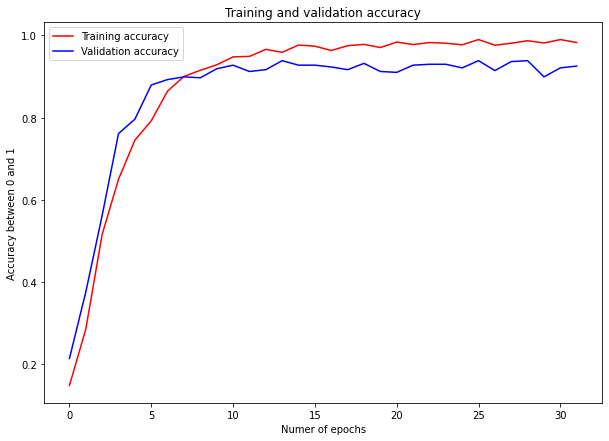

<Figure size 432x288 with 0 Axes>

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to display a graph of the training and validation loss.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize = (10,7))
ax = fig.gca()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.xlabel("Numer of epochs")
plt.ylabel("Accuracy between 0 and 1")
plt.figure()

plt.show()

### Testing Model

We have trained our model, analysed and compared training data and validation losses. Now we can test our model with data, not in the train or validation directory. When you ran the splitting option, part of the data was sent to the test directory.

You can run first this code cell to see the result of our classification and then download some images from the internet and store them in the test directory. If you add new images, please rerun the cell below.

Find the test directory in ```animal_data/test```. You will find a subdirectory for each class (animal).

<font color="red">(Important)</font> If you are running the Jupyter Notebook on Google Colab the directory is ```content/animal/test```. Find the directory folder on the left in desktop mode.

After running this code cell, the results are prompted in the console. The Tensorflow display the results are not exciting. You will see the name of the class and what animal it is classified. The thing is, the results are listed with precision and no label. In the next code cell, you will be able to display the label classified and show the animal image below 😁.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to load the function to predict the animal.

def predict_image(testing_dir, model, labels):
  predicted_data = pd.DataFrame(columns=["label", "prediction", "image"])
  files = os.listdir(testing_dir)
  for file in files:
    path = testing_dir + "/" + file
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    index = np.argmax(classes)
    label = labels[index]
    predicted_data = pd.concat([predicted_data, 
            pd.DataFrame.from_records([{"label": label, "prediction": classes, "image": file}])])

  return predicted_data

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to predict the animals in the testing data.
predicted_data = predict_image(TESTING_DIR, model, animal_labels)

In the code block below, it will display the first five images. You can slide the slider to show more or fewer results.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to display the predictions' results.
slider = widgets.IntSlider(
    value=5,
    min=0,
    max=len(predicted_data),
    step=1,
    description='Results:',
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

@widgets.interact(input=slider)
def render(input):
    print(predicted_data.iloc[0:input, :2])

interactive(children=(IntSlider(value=5, description='Results:', max=106), Output()), _dom_classes=('widget-in…

The code cell below is a function to display the test results with label and images. You should run this function first so you can call it as many time as you want.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to load function ```show_predicted_data```
def show_predicted_data(predicted_data, collabel="label", colimage="image", testing_dir=""):
    rows = len(predicted_data[collabel].unique()) # 20
    cols = predicted_data.groupby([collabel])[collabel].count().max() # 13
    
    fig, ax = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True)
    fig.set_size_inches(15, 15)
    
    ax = ax.flatten()
    for i in range(5):
        img = image.load_img(testing_dir + "/" + predicted_data.iloc[i][colimage], target_size=(150, 150))
        ax[i].imshow(img)
        ax[i].set_title(predicted_data.iloc[i][collabel])
        ax[i].set_xticks([])
        ax[i].set_yticks([])

Now we are ready to display the results! If you add new images to the test directory. Do not forget to test the section again. You do not need to run the function to display the results again. You can call the function as we will do in the code cell below.

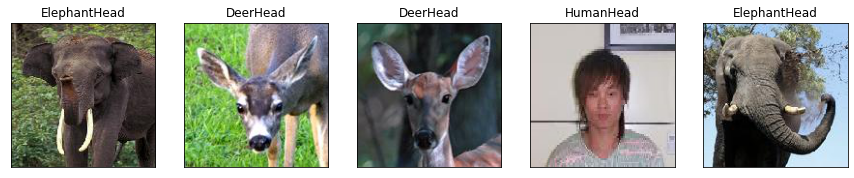

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to show the five first results!!

show_predicted_data(predicted_data, collabel="label", colimage="image", testing_dir=TESTING_DIR)

You might want to reuse the model without training it over again. Run the code cell below to create a copy of the model. It will be available in your root directory. Remember that the root directory in Google Colab is in ```content/```.

Your saved model will be saved under the name ```animals_faces.h5```.

## Saving and Loading Model

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to save your model for later use.
model.save("animals_faces.h5")

If you do not know how to load the saved model, you can find an example below.

In [ ]:
# load the model from disk
loaded_model = tf.keras.models.load_model("animals_faces.h5")

## Testing Model With New Data

To test my model with different images I downloaded two images which I made available in my GitHub repository: https://github.com/raulFuzita/cct_ai/tree/2022_5_20/images/new_imagens

I just chose these images for the sake of the example. Too many images would fill the entire screen.

#### New Images

<img src="https://github.com/raulFuzita/cct_ai/blob/2022_5_20/images/new_imagens/big-face-jerome-cat.jpg?raw=true" alt="A face of a white cat" />

<img src="https://github.com/raulFuzita/cct_ai/blob/2022_5_20/images/new_imagens/louisiana-black-bear-1368742.jpg?raw=true" alt="Lousiana black bear" />

#### The Result

The result was the images that were already there and the new images I added.

<img src="https://github.com/raulFuzita/cct_ai/blob/2022_5_20/images/results/output.png?raw=true" alt="the result of the model classification with new images" />

# Second classification Algorithms 

## VGG16

VGG16 is a convolutional neural network that is frequently used in visual recognition tasks. It is known for its simplicity and uniformity, and has been used in many image recognition competitions.

For the second model, we can reuse ImageDataGenerator and the generators from the previous model. This way, we can use VGG16 and compare both models.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to configure the neural network which is our model.

vgg16 = VGG16(include_top=False, weights='imagenet')

model_vgg16 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(number_of_classes, activation='softmax') # 1 because we have only 1 class
])

model_vgg16.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy',metrics=['accuracy'])

checkpoint = ModelCheckpoint(vgg16, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

model_vgg16.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 17, 17, 128)     

e:\AppData\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to train the model.
vgghist = model_vgg16.fit(train_generator, validation_data=validation_generator, epochs=32, verbose=1)

Epoch 1/32
57/57 [==============================] - 80s 1s/step - loss: 0.2259 - accuracy: 0.1355 - val_loss: 0.1874 - val_accuracy: 0.1619
Epoch 2/32
57/57 [==============================] - 75s 1s/step - loss: 0.1849 - accuracy: 0.1665 - val_loss: 0.1751 - val_accuracy: 0.1969
Epoch 3/32
57/57 [==============================] - 77s 1s/step - loss: 0.1691 - accuracy: 0.2511 - val_loss: 0.1587 - val_accuracy: 0.2779
Epoch 4/32
57/57 [==============================] - 86s 2s/step - loss: 0.1531 - accuracy: 0.3390 - val_loss: 0.1424 - val_accuracy: 0.4223
Epoch 5/32
57/57 [==============================] - 77s 1s/step - loss: 0.1379 - accuracy: 0.4231 - val_loss: 0.1309 - val_accuracy: 0.4354
Epoch 6/32
57/57 [==============================] - 78s 1s/step - loss: 0.1250 - accuracy: 0.4878 - val_loss: 0.1125 - val_accuracy: 0.5886
Epoch 7/32
57/57 [==============================] - 75s 1s/step - loss: 0.1148 - accuracy: 0.5404 - val_loss: 0.1086 - val_accuracy: 0.5952
Epoch 8/32
57/57 [==

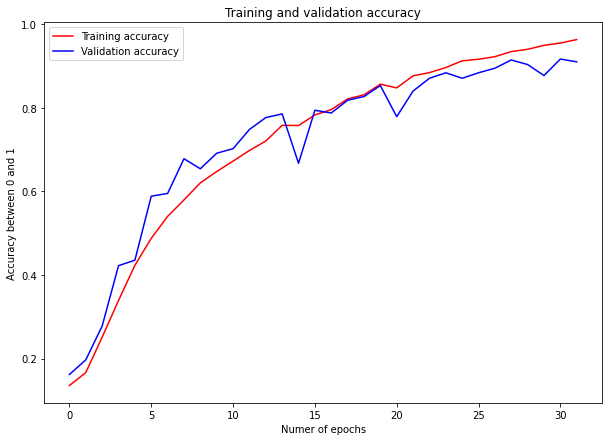

<Figure size 432x288 with 0 Axes>

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to display a graph of the training and validation loss.

acc = vgghist.history['accuracy']
val_acc = vgghist.history['val_accuracy']
loss = vgghist.history['loss']
val_loss = vgghist.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize = (10,7))
ax = fig.gca()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.xlabel("Numer of epochs")
plt.ylabel("Accuracy between 0 and 1")
plt.figure()

plt.show()

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to predict the animals in the testing data.
predicted_data_vgg16 = predict_image(TESTING_DIR, model_vgg16, animal_labels)

In the code block below, it will display the first five images. You can slide the slider to show more or fewer results.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to display the predictions' results.
slider = widgets.IntSlider(
    value=5,
    min=0,
    max=len(predicted_data_vgg16),
    step=1,
    description='Results:',
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

@widgets.interact(input=slider)
def render(input):
    print(predicted_data_vgg16.iloc[0:input, :2])

interactive(children=(IntSlider(value=5, description='Results:', max=106), Output()), _dom_classes=('widget-in…

Now we are ready to display the results! If you add new images to the test directory. Do not forget to test the section again. You do not need to run the function to display the results again. You can call the function as we will do in the code cell below.

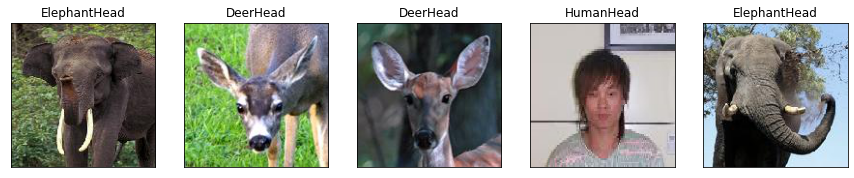

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to show the five first results!!
show_predicted_data(predicted_data_vgg16, collabel="label", colimage="image", testing_dir=TESTING_DIR)

# Semantic Analysis

The dataset used in this project to train the semantic analysis model is originally from Kaggle and comments from Reddit. They made two datasets available—one with words and the actual sentiment rate from Twitter and another from Reddit.

Find the original dataset availabel at <a href="https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset">Twitter and Reddit Sentimental analysis Dataset</a>

**About this dataset**

Clean Comment: Comments made by the people extracted from Various Reddit (SubReddits) Mainly Focused on Comments.

Category: Describes the Actual Sentiment of the Respective comment Ranging from -1 to 1.


<font color="red">(Important)</font> Google Colab Jupyter Notebook has approximately 13GB of RAM. A large dataset or the type of encoding you choose can consume all the resources available, leading to a crash. If you have the paid version, you should not worry. However, if you are using the free version, please select the options Google Colab or just run the code cell. It is the default value.

If you are running this notebook on a local machine and your machine does not have enough memory RAM available, the model will be trained anyway. However, it will take much longer to process. The same might happen if you have a slow CPU.

Selecting the lighter version of the dataset might impact the accuracy.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to select your dataset version.

df = None

env_dropdown = widgets.Dropdown(
    options=['Google Colab (Recommended)', 'Local Jupyter Notebook'],
    value='Google Colab (Recommended)',
    description='Environment:',
)

@widgets.interact(input=env_dropdown)
def render(input):
    global df
    if input == 'Google Colab (Recommended)':
        # lighter version for Colab
        print('Dataset lighter version for Colab')
        df = pd.read_csv("https://raw.githubusercontent.com/raulFuzita/cct_ai/2022_5_20/data/Reddit_Data_8000_lighter.csv")
    else:
        print('Dataset full version for local notebook')
        df = pd.read_csv("https://raw.githubusercontent.com/raulFuzita/cct_ai/2022_5_20/data/Reddit_Data.csv")
    print(df.head())

interactive(children=(Dropdown(description='Environment:', options=('Google Colab (Recommended)', 'Local Jupyt…

## Cleaning Dataset

Displaying the shape of the dataset can show you how big is your dataset.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to show the shape of the dataset.
df.shape

(8000, 2)

Printing the dataset information can help you know what type of data each column has. If a column is expected to be a numerical display type object, we know there is a problem.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to display the dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  7984 non-null   object
 1   category       8000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 125.1+ KB


The function ```describe``` can give you valuable insight into your dataset. We can learn from this analysis that the min value is negative, the mean 0 and from the 75 percentile to the max is 1.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to describe the dataset.
df.describe()

,category
count,8000.000000
mean,0.215125
std,0.802139
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


As we analysed from the previous command, the values indeed are minimal. Now we know the unique values range from -1 to 1. 

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to display unique values in the ```category``` column.
df['category'].unique()

array([ 1, -1,  0], dtype=int64)

The next step is to check if there are any Na values. You should be able to see after the attribute's name whether there is any missing data.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to check if there are any missing values in the dataset.
df.isnull().sum()

clean_comment    16
category          0
dtype: int64

If there is any missing data we can call the function ```dropna``` to remove them.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to remove any rows with missing values.
df.dropna(inplace=True)
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

We can do a similar thing to check if duplicate values are in the dataset.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to check if there are any duplicate values in the dataset.
df.duplicated().sum()

40

If there is any duplicate values we can call the function ```drop_duplicates``` to remove them.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to check if there are any duplicate values in the dataset.
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

Now we can plot a bar chart to compare each category's frequency.

<AxesSubplot:xlabel='category', ylabel='count'>

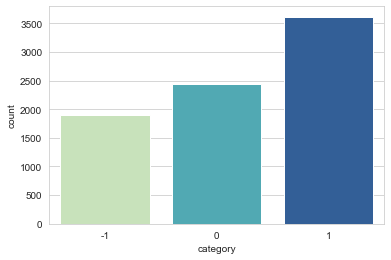

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to plot a bar chart.
sns.set_style('whitegrid')
sns.countplot(x='category',data=df, palette='YlGnBu')

## Preparing Dataset

### Calculation of Polarity

The bar chart above is hard to read. We have to know what the number represents to understand the graphic. We can create a new column, and for each numerical value, we can add a categorical one.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to create a categorical variable. The number -1 is assigned to the category ```'Negative'```, the number 0 is assigned to the category ```'Neutral'```, and the number 1 is assigned to the category ```'Positive'```.

df['Polarity_Rating'] = df['category'].apply(lambda x: 'Positive' if x == 1 else('Neutral' if x == 0  else 'Negative'))

### Plot the Polarity Rating count

Now we can plot the bar chart one more time, but this time it will be much easier to read.

<AxesSubplot:xlabel='Polarity_Rating', ylabel='count'>

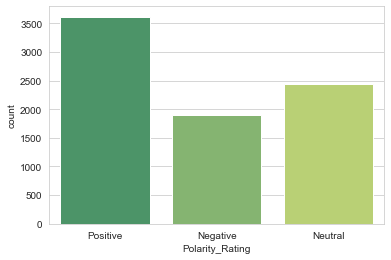

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to plot the previous data as polarity rating
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

### Apply One hot encoding or rescale

We can apply hot encoding to convert from categorical to numerical. If we apply hot encoding, it will generate one column for each categorical type. This can increase the size of the dataset significantly. Consequently, the model will take much longer. The code will crash if you do not apply hot encoding and try to pass the category attribute. It will not accept negative values. One way if you do not want to increase the size of the dataset significantly is to rescale the values from -1, 0, 1 to 0, 1, 2.

If we use hot encoding, the loss type should be ```categorical_crossentropy```. However, it will not work for our category attribute, even though we rescale it. We have also to change the loss type to ```sparse_categorical_crossentropy```. Do not worry. You do not have to deal with that. We will handle it automatically for you. Just select what option you want in the dropdown box, and we will do everything.

In [ ]:
#@markdown 👈 &nbsp; You are required to run this cell only once. Then you select a different option if you want.

ishot_encoding = True

env_dropdown = widgets.Dropdown(
    options=['Hot Encoding', 'Rescaling'],
    value='Hot Encoding',
    description='Method:',
)

@widgets.interact(input=env_dropdown)
def render(input):
    global ishot_encoding
    if input == 'Hot Encoding':
        ishot_encoding = True
    else:
        ishot_encoding = False

interactive(children=(Dropdown(description='Method:', options=('Hot Encoding', 'Rescaling'), value='Hot Encodi…

The following code cell will apply the appropriate method to your data according to your selected option.

In [ ]:
#@markdown 👈 &nbsp; When you select a diferent option, please run this cell again.

if ishot_encoding:
    print('Applying Hot Encoding')
    one_hot = pd.get_dummies(df["Polarity_Rating"])
    df = pd.concat([df,one_hot],axis=1)
    df.drop('category', axis=1, inplace=True)
else:
    print('Applying Rescaling')
    df['category'] = df['category'].apply(lambda x: x+1)
df.drop('Polarity_Rating', axis=1, inplace=True)
df.head()

Applying Rescaling


,clean_comment,category
0,family mormon have never tried explain them t...,2
1,buddhism has very much lot compatible with chr...,2
2,seriously don say thing first all they won get...,0
3,what you have learned yours and only yours wha...,1
4,for your own benefit you may want read living ...,2


In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to load a function to handle stopwords.
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

It is not a requirement; however, we recommend you run this cell to process all texts to make sure they are in the appropriate format.t.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to call the function to handle stopwords.
df['comment'] = df['clean_comment'].apply(get_text_processing)
df.drop('clean_comment', axis=1, inplace=True)
df.head()

,category,comment
0,2,family mormon never tried explain still stare ...
1,2,buddhism much lot compatible christianity espe...
2,0,seriously say thing first get complex explain ...
3,1,learned want teach different focus goal wrappi...
4,2,benefit may want read living buddha living chr...


In the next code cell, we will set the correct predictors and label them according to the options selected previously.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to prepare the predictors and labels.

sentiment_label = ['Negative 👎', 'Neutral 😐',	'Positive 😄']

if ishot_encoding:
    predictors = 'comment'
    label = ['Negative', 'Neutral',	'Positive']
else:
    predictors = 'comment'
    label = 'category'
df.head()

,category,comment
0,2,family mormon never tried explain still stare ...
1,2,buddhism much lot compatible christianity espe...
2,0,seriously say thing first get complex explain ...
3,1,learned want teach different focus goal wrappi...
4,2,benefit may want read living buddha living chr...


### Apply Train Test Split

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to apply the train-test-split method. The test size is set to 0.10.
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[label], test_size=0.10, random_state=42)
Xy_test = pd.concat([X_test, y_test], axis=1)

### Apply vectorization

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to fit the mode and transform the test data.
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

### Apply frequency, inverse document frequency

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to apply TfidfTransformer
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

### Add different layers

This step will set the loss type to ```categorical_crossentropy``` or ```sparse_categorical_crossentropy``` according to the option you selected before.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to configure the neural network which is our model.

model_sa = Sequential()

model_sa.add(Dense(units=12673,activation='relu'))
model_sa.add(Dropout(0.5))

model_sa.add(Dense(units=4000,activation='relu'))
model_sa.add(Dropout(0.5))

model_sa.add(Dense(units=500,activation='relu'))
model_sa.add(Dropout(0.5))

model_sa.add(Dense(units=3, activation='softmax'))

if ishot_encoding:
    model_sa.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
else:
    model_sa.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

If all is properly configured, we can finally train our model. The full version of the dataset will take very long, and the lighter version will not take as much longer.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to train the model. Keep in mind that the model will take a while to train.

model_sa.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
28/28 [==============================] - 307s 11s/step - loss: 0.9047 - accuracy: 0.5717 - val_loss: 0.6547 - val_accuracy: 0.7157
Epoch 2/100
28/28 [==============================] - 331s 12s/step - loss: 0.2628 - accuracy: 0.9124 - val_loss: 0.7325 - val_accuracy: 0.7610
Epoch 3/100
28/28 [==============================] - 311s 11s/step - loss: 0.0303 - accuracy: 0.9923 - val_loss: 1.0105 - val_accuracy: 0.7434
Epoch 3: early stopping


### Evaluation of Model

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to show the accuracy of the model.

model_score = model_sa.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

13/13 [==============================] - 8s 633ms/step - loss: 1.0105 - accuracy: 0.7434
Test accuracy: 0.7433962225914001


### Prediction

The result of the prediction is not easy to understand. So, after the next code cell, e have an algorithm to display the results nicely.

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to show the prediction results.

y_pred = model_sa.predict(X_test)
y_pred

array([[3.5710596e-06, 7.9082710e-08, 9.9999630e-01],
       [4.8842299e-04, 9.9926108e-01, 2.5054091e-04],
       [5.0230748e-05, 4.4543822e-06, 9.9994528e-01],
       ...,
       [8.8003159e-01, 3.6950145e-04, 1.1959893e-01],
       [1.5103571e-03, 2.9915440e-04, 9.9819046e-01],
       [9.9548471e-01, 1.1859890e-05, 4.5034843e-03]], dtype=float32)

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to show the prediction nicely. Some Jupyter Notebook might hide part of the result. If they make it available, click on the link to see the whole result.
def show_analysis_result(y_pred, Xy_test, sentiment_label):
    for i in range(len(y_pred)):
        print('='*70)
        pred_index = y_pred[i].argmax()
        if ishot_encoding:
            print('Prediction:', sentiment_label[pred_index])
        else:
            print('Prediction:', '({}) {}'.format(pred_index, sentiment_label[pred_index]))
        print('Probability:', y_pred[i][pred_index])
        print('-'*70)
        print(Xy_test.iloc[i], '\n\n')

show_analysis_result(y_pred, Xy_test, sentiment_label)

Prediction: (2) Positive 😄
Probability: 0.9999963
----------------------------------------------------------------------
comment     lol another kaangress shehjada rhetoric
category                                          2
Name: 1169, dtype: object 


Prediction: (1) Neutral 😐
Probability: 0.9992611
----------------------------------------------------------------------
comment     remember sheila dixit 370 page proof
category                                       1
Name: 2297, dtype: object 


Prediction: (2) Positive 😄
Probability: 0.9999453
----------------------------------------------------------------------
comment     parent superstitious still stuff forced respec...
category                                                    2
Name: 7207, dtype: object 


Prediction: (2) Positive 😄
Probability: 0.9900152
----------------------------------------------------------------------
comment     marriage child marriage void initio add fact n...
category                                  

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to show the shpe of the test data.
y_pred.shape

(795, 3)

### New Test Data

In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to load a new dataset
df_new = pd.DataFrame({'comment': [
    'I\'m so exiceted to learn more about AI! ', 'I\'m a little upset because I wish I could have done more.'],
    'category': [2, 0]})
df_new

,comment,category
0,I'm so exiceted to learn more about AI!,2
1,I'm a little upset because I wish I could have...,0


In [ ]:
#@markdown 👈 &nbsp; Please, run this cell to predict the sentiment of the new dataset.
new_test = df_new['comment']
new_test = vect.transform(new_test)
new_test = tfidf.transform(new_test)
new_test = new_test.toarray()

y_new_pred = model_sa.predict(new_test)

show_analysis_result(y_new_pred, df_new, sentiment_label)

# References

In [ ]:
#@markdown 👈 &nbsp; No need to run this cell unless the data set of references was updated. <font color='green'>(Optional)</font>
df_ref = pd.read_csv('https://raw.githubusercontent.com/raulFuzita/cct_ai/2022_5_20/references_ca2.csv', encoding = 'unicode_escape', engine ='python')

In [ ]:
#@markdown 👈 &nbsp;No need to run this cell unless the data set of references was updated. <font color='green'>(Optional)</font>

#@markdown &emsp;&emsp;This cell contains a simple algorithm to display the references according to Harvard style. 
#@markdown The data set has the same structure required for Microsoft Word reference for Book section, Web site, and Document from a web site.

#@markdown &emsp;&emsp;For the structure of the CSV file visit <a ref="https://github.com/raulFuzita/cct_ai/tree/2022_4_8">Raul Fuzita github</a>
#@markdown and check the referece_example.csv file.

# Author: Raul Macedo Fuzita
# Github: https://github.com/raulFuzita
# Date: 17-03-2022
# Version: 1.0.0

def website(ref):
    return ('<p>' + ref['Author'] + ', ' + str(ref['Year']) + ', <i>' + ref['Title'] + '</i>. [Online]</br>Available at: <a href="' + ref['Available_At'] 
    + '">' + ref['Available_At'] + '</a></br>' 
    + '[Accessed ' + str(ref['Year_Accessed']) + ' ' + ref['Month_Accessed'] + ' ' + str(ref['Day_Accessed']) + '].</p></br>')

def bookSection(ref):
    return ('<p>' + ref['Author'] + ', ' + str(ref['Year']) + '. In: ' + ref['Editor'] + ', ed. <i>' + ref['Book_Title'] 
    + '</i>. ' + ref['City'] + ': ' + ref['Publisher'] + ', p. ' + str(ref['Pages']) + '.</p></br>')

def harvardReference(df):
    df.replace(r'^\s*$', np.nan, regex=True)
    df = df.reset_index()
    df = df.sort_values('Author')
    df.fillna(0, inplace=True)
    colsToInt = ['Year', 'Day', 'Pages', 'Year_Accessed', 'Day_Accessed']
    df[colsToInt] = df[colsToInt].astype(int)
    content = '<div style="font-size: 1.2em">'
    for index, row in df.iterrows():
        if row['Type_of_Source'] == 'Book section':
            content += bookSection(row)
        elif row['Type_of_Source'] == 'Web site':
            content += website(row)
        elif row['Type_of_Source'] == 'Document from web site':
            content += website(row)
        else:
            content += ''
    content += '</div>'
    chart = HTML(content)
    display(chart)

In [ ]:
#@markdown 👈 &nbsp; No need to run this cell unless the data set of references was updated. If there is an update do not forget to run the cell to import the data set and the algorithm to print the references in Harvard style. <font color='green'>(Optional)</font>

#@markdown &emsp;&emsp;Please, scroll up or down to see all the references. 

harvardReference(df_ref)